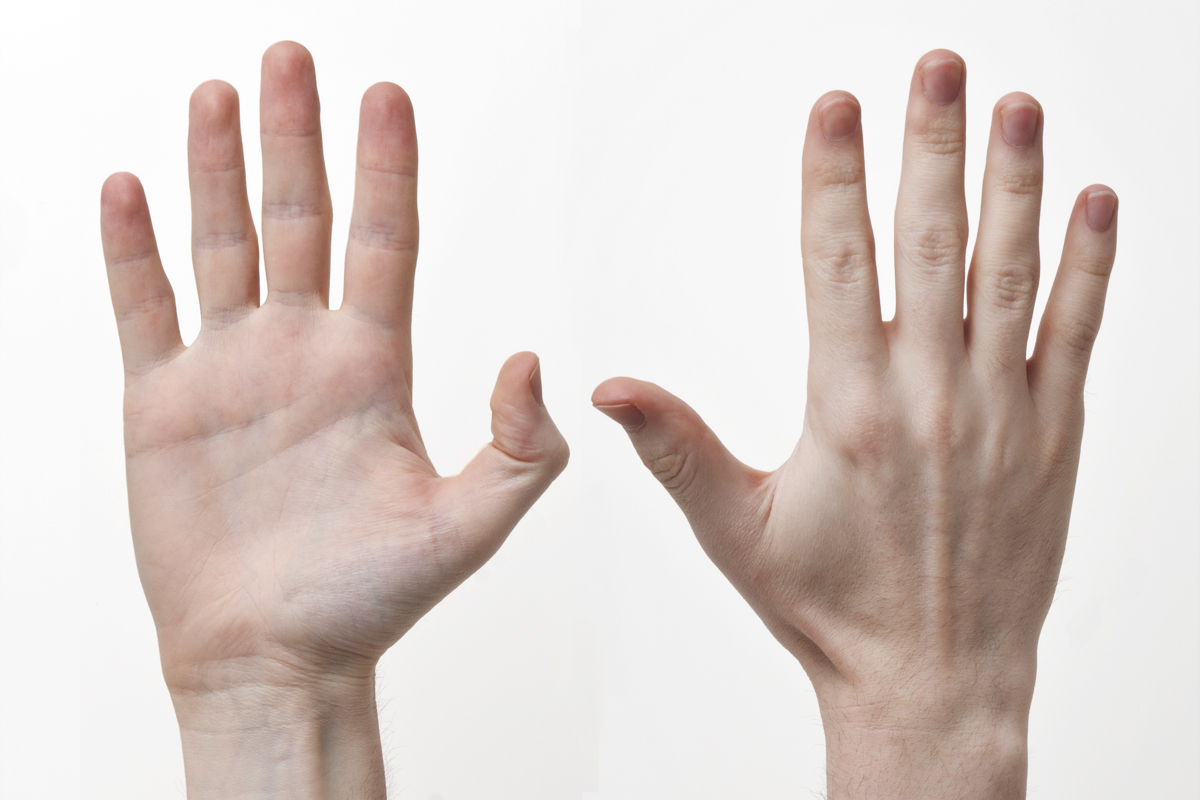

In [1]:
from IPython.display import Image
Image("./extraFiles/Human-Hands-Front-Back.jpg")

### In this project I will try to clasify between hand movements: Spontanious, Synchronised and Alone

The main part of this project is to upload the data, and turn it into a dataFrame. So lets begin.

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
# this will make a DF which doesnt include the alone data.
# it will merge each left and right hand that have the same frame id
def CreateDF_NA(path):
    df = pd.read_csv(path)
    time_to_drop=math.ceil(df["Time"][0])+7
    df=df[df["Time"]>time_to_drop]
    if 'Sync' in path:
        df.insert(loc=1,column='label', value = 1)
    if 'Spontan' in path:
        df.insert(loc=1,column='label', value = 2)
    hand = df.groupby(df[' Hand Type'])
    right = hand.get_group("right")
    left = hand.get_group("left")
    df = pd.merge(left, right, how='left', on= ' Frame ID')
    return df

In [4]:
# this will make a DF for the alone files.
# it will merge the right hand into the alone left hand and will also remove any hands that are in the wrong place
def CreateDF_A(path):
    df = pd.read_csv(path)
    time_to_drop=math.ceil(df["Time"][0])+7
    df=df[df["Time"]>time_to_drop]
    temp = pd.read_csv('./extraFiles/HandRight.csv')
    df.insert(loc=1,column='label',value=0)
    df=df[df[' Hand Type']=='left']
    temp=temp[temp[' Hand Type']=='right']   
    temp=temp.iloc[:len(df)]
    temp=temp.reset_index(drop=True)
    df=df.reset_index(drop=True)
    df= pd.merge(df,temp,left_index=True,right_index=True,how='left')
    return df

In [5]:
# uploading all the DF
Evyatar_Sp = CreateDF_NA(".\extraFiles\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv")
Evyatar_alone = CreateDF_A(".\extraFiles\Training\Evyatar Cohen\Evyatar636771054555711409Alone.csv")
Evyatar_Sy = CreateDF_NA(".\extraFiles\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv")
Nofar_Sp = CreateDF_NA(r".\extraFiles\Training\Nofar Social_Nuero\NofarSpontan.csv")
Nofar_alone = CreateDF_A(r".\extraFiles\Training\Nofar Social_Nuero\NofarAlone.csv")
Nofar_Sy = CreateDF_NA(r".\extraFiles\Training\Nofar Social_Nuero\NofarSync.csv")
Oriya_Sp = CreateDF_NA(".\extraFiles\Training\Oriya Social_Nuero\OriyaSpontan.csv")
Oriya_Sy = CreateDF_NA(".\extraFiles\Training\Oriya Social_Nuero\OriyaSync.csv")
Oriya_alone = CreateDF_A(".\extraFiles\Training\Oriya Social_Nuero\OriyaAlone.csv")
Orya_Sp = CreateDF_NA("./extraFiles/Training/Orya Kalmanovitz/OryaSpontan.csv")
Orya_Sy = CreateDF_NA("./extraFiles/Training/Orya Kalmanovitz/OryaSync.csv")
Orya_alone = CreateDF_A("./extraFiles/Training/Orya Kalmanovitz/OryaAlone.csv")
Revital_Sp = CreateDF_NA("./extraFiles/Training/Revital Marbel/RevitalSpontan.csv")
Revital_Sy = CreateDF_NA("./extraFiles/Training/Revital Marbel/RevitalSync.csv")
Revital_alone = CreateDF_A("./extraFiles/Training/Revital Marbel/RevitalAlone.csv")
Shahar_Sp = CreateDF_NA(".\extraFiles\Training\Shahar Terner\SacharSpontan.csv")
Shahar_Sy = CreateDF_NA(".\extraFiles\Training\Shahar Terner\SacharSync.csv")
Shahar_alone = CreateDF_A(".\extraFiles\Training\Shahar Terner\SacharAlone.csv")
Shelly_Sp = CreateDF_NA("./extraFiles/Training/Shelly Social_Nuero/ShellySpontan.csv")
Shelly_Sy = CreateDF_NA("./extraFiles/Training/Shelly Social_Nuero/ShellySync.csv")
Shelly_alone = CreateDF_A("./extraFiles/Training/Shelly Social_Nuero/ShellyAlone.csv")
Yael_Sp = CreateDF_NA("./extraFiles/Training/Yael Hagai/YaelSpontan.csv")
Yael_Sy = CreateDF_NA("./extraFiles/Training/Yael Hagai/YaelSync.csv")
Yael_alone = CreateDF_A("./extraFiles/Training/Yael Hagai/YaelAlone.csv")
Yoel_Sp = CreateDF_NA("./extraFiles/Training/Yoel Raz/YoelSpontan.csv")
Yoel_Sy = CreateDF_NA("./extraFiles/Training/Yoel Raz/YoelSync.csv")
Yoel_alone = CreateDF_A("./extraFiles/Training/Yoel Raz/YoelAlone.csv")




Now that I have created a Df for each person I will start to connect them and make the big training Df

In [6]:
Sp_list = [Evyatar_Sp, Nofar_Sp, Oriya_Sp, Orya_Sp, Revital_Sp, Shahar_Sp, Shelly_Sp, Yael_Sp, Yoel_Sp]
Sy_list = [Evyatar_Sy, Nofar_Sy, Oriya_Sy, Orya_Sy, Revital_Sy, Shahar_Sy, Shelly_Sy, Yael_Sy, Yoel_Sy]
A_list = [Evyatar_alone, Nofar_alone, Oriya_alone, Orya_alone, Revital_alone, Shahar_alone, Shelly_alone, Yael_alone, Yoel_alone]

Spontan_df = pd.concat(Sp_list)
Sync_df = pd.concat(Sy_list)
A_df = pd.concat(A_list)
print(Spontan_df.shape)
print(Sync_df.shape)
print(A_df.shape)

(34305, 45)
(33754, 45)
(34037, 45)


We have made a big data frame for each hand situation. Now we need to make the final data frame for each hand

In [7]:
# This function will remove the unneeded features. It will also remove some rows that we dont need, 
# and merge three time stamps into one data point. 
def makeFDF(df = pd.DataFrame):
    df = df.rename(columns ={'label_x':'label'})
    df.drop(['Time_x', ' Frame ID', ' Hand Type_x', ' # hands_x', 'Time_y', ' Hand Type_y', ' # hands_y', 'label_y'], inplace = True, axis = 1)
    df['key'] = np.arange(1,len(df)+1)
    df = df[df['key']%5 != 4]
    i = np.arange(1,len(df)+1)
    df['key'] = i%3
    
    df0 = df[df['key'] == 0]
    j = np.arange(1,(len(df)/3)+1)
    df0['key'] = j

    df1 = df[df['key'] == 1]
    j = np.arange(1,(len(df)/3)+1)
    df1['key'] = j

    df2 = df[df['key'] == 2]
    j = np.arange(1,(len(df)/3)+1)
    df2['key'] = j
    
    final_df = pd.merge(df0,df1,how='outer',on=['key','label'])
    final_df = pd.merge(final_df, df2, how='outer', on=['key','label'])
    
    return final_df
    

In [8]:
# had to adjust the alone DF
A_df = A_df.rename(columns = {' Frame ID_x': ' Frame ID'})
A_df.drop([' Frame ID_y'], inplace = True, axis = 1 )

In [9]:
Final_Sync = makeFDF(Sync_df)
Final_Spontan = makeFDF(Spontan_df)
print(Final_Sync.shape)
print(Final_Spontan.shape)

(9001, 110)
(9148, 110)


In [10]:
# this will make the Alone data frame.
A_df.drop(['Time_x', ' Frame ID', ' Hand Type_x', ' # hands_x', 'Time_y', ' Hand Type_y', ' # hands_y'], inplace = True, axis = 1)
A_df['key'] = np.arange(1,len(A_df)+1)
A_df = A_df[A_df['key']%5 != 4]
i = np.arange(1,27231)
A_df['key'] = i%3
    
df0 = A_df[A_df['key'] == 0]
j = np.arange(1,9077)
df0['key'] = j

df1 = A_df[A_df['key'] == 1]
j = np.arange(1,9078)
df1['key'] = j

df2 = A_df[A_df['key'] == 2]
j = np.arange(1,9078)
df2['key'] = j
    
final_df = pd.merge(df0,df1,how='outer',on=['key', 'label'])
final_A = pd.merge(final_df, df2, how='outer', on=['key', 'label'])

In [11]:
Final_ls = [final_A, Final_Spontan, Final_Sync]
Train = pd.concat(Final_ls)
Train.shape

(27226, 110)

Now we have our final Traning DataFrame ready, we will make our Testing data set. 

In [12]:
Litel_alone = CreateDF_A(".\extraFiles\Validation\Itiel Lab\ItielAlone.csv")
Litel_Sp = CreateDF_NA(".\extraFiles\Validation\Itiel Lab\ItielSpontan.csv")
Litel_Sync = CreateDF_NA(".\extraFiles\Validation\Itiel Lab\ItielSync.csv")
Mor_alone = CreateDF_A(".\extraFiles\Validation\Mor SHerman\MorAlone.csv")
Mor_Sp = CreateDF_NA(".\extraFiles\Validation\Mor SHerman\MorSpontan.csv")
Mor_Sync = CreateDF_NA(".\extraFiles\Validation\Mor SHerman\MorSync.csv")
Oded_alone = CreateDF_A(".\extraFiles\Validation\Oded Medina\OdedAlone.csv")
Oded_Sp = CreateDF_NA(".\extraFiles\Validation\Oded Medina\OdedSpontan.csv")
Oded_Sync = CreateDF_NA(".\extraFiles\Validation\Oded Medina\OdedSync.csv")

In [13]:
Sp_list = [Litel_Sp, Mor_Sp, Oded_Sp]
Sy_list = [Litel_Sync, Mor_Sync, Oded_Sync]
A_list = [Litel_alone, Mor_alone, Oded_alone]

Spontan_Tdf = pd.concat(Sp_list)
Sync_Tdf = pd.concat(Sy_list)
A_Tdf = pd.concat(A_list)
print(Spontan_df.shape)
print(Sync_df.shape)
print(A_Tdf.shape)


(34305, 45)
(33754, 45)
(10133, 45)


In [14]:
# This function will remove the unneeded features. It will also remove some rows that we dont need, 
# and merge three time stamps into one data point. 
def makeTFDF(df = pd.DataFrame):
    df = df.rename(columns = {'label_x':'label'})
    df.drop(['Time_x', ' Frame ID', ' Hand Type_x', ' # hands_x', 'Time_y', ' Hand Type_y', ' # hands_y', 'label_y'], inplace = True, axis = 1)
    df['key'] = np.arange(1,len(df)+1)
    df = df[df['key']%5 != 4]
    i = np.arange(1,len(df)+1)
    df['key'] = i%3
    
    df0 = df[df['key'] == 0]
    j = np.arange(1,(len(df)/3))
    df0['key'] = j

    df1 = df[df['key'] == 1]
    j = np.arange(1,(len(df)/3)+1)
    df1['key'] = j

    df2 = df[df['key'] == 2]
    j = np.arange(1,(len(df)/3))
    df2['key'] = j
    
    final_df = pd.merge(df0,df1,how='outer',on=['key','label'])
    final_df = pd.merge(final_df, df2, how='outer', on=['key', 'label'])
    
    return final_df
    

In [15]:
# This function will remove the unneeded features. It will also remove some rows that we dont need, 
# and merge three time stamps into one data point. 
def makeAFDF(df = pd.DataFrame):
    df.drop(['Time_x', ' Frame ID', ' Hand Type_x', ' # hands_x', 'Time_y', ' Hand Type_y', ' # hands_y'], inplace = True, axis = 1)
    df['key'] = np.arange(1,len(df)+1)
    df = df[df['key']%5 != 4]
    i = np.arange(1,len(df)+1)
    df['key'] = i%3
    
    df0 = df[df['key'] == 0]
    j = np.arange(1,(len(df)/3))
    df0['key'] = j

    df1 = df[df['key'] == 1]
    j = np.arange(1,(len(df)/3)+1)
    df1['key'] = j

    df2 = df[df['key'] == 2]
    j = np.arange(1,(len(df)/3))
    df2['key'] = j
    
    final_df = pd.merge(df0,df1,how='outer',on=['key', 'label'])
    final_df = pd.merge(final_df, df2, how='outer', on=['key', 'label'])
    
    return final_df
    

In [16]:
A_Tdf = A_Tdf.rename(columns = {' Frame ID_x': ' Frame ID'})
A_Tdf.drop([' Frame ID_y'], inplace = True, axis = 1 )

In [17]:
Final_TSpon = makeTFDF(Spontan_Tdf)
Final_TSync = makeTFDF(Sync_Tdf)
Final_Atdf = makeAFDF(A_Tdf)
print(Final_TSpon.shape)
print(Final_TSync.shape)
print(Final_Atdf.shape)

(2699, 110)
(2652, 110)
(2703, 110)


In [18]:
testls = [Final_Atdf, Final_TSpon, Final_TSync]
Test = pd.concat(testls)

In [19]:
print(Test.shape)
print(Train.shape)


(8054, 110)
(27226, 110)


In [20]:
# Removing null values from train and test. 
Train = Train.dropna()
Test = Test.dropna()
print(Test.isna().sum())
print(Train.isna().sum())

label                0
 Position X_x_x      0
 Position Y_x_x      0
 Position Z_x_x      0
 Velocity X_x_x      0
                    ..
 Elbow Pos Y_y       0
 Elbow Pos Z_y       0
 Grab Strenth_y      0
 Grab Angle_y        0
 Pinch Strength_y    0
Length: 110, dtype: int64
label                0
 Position X_x_x      0
 Position Y_x_x      0
 Position Z_x_x      0
 Velocity X_x_x      0
                    ..
 Elbow Pos Y_y       0
 Elbow Pos Z_y       0
 Grab Strenth_y      0
 Grab Angle_y        0
 Pinch Strength_y    0
Length: 110, dtype: int64


In [21]:
Train.drop(['key'], inplace = True, axis = 1)
Test.drop(['key'], inplace = True, axis = 1)
print(Test.shape)
print(Train.shape)

(8045, 109)
(27139, 109)


We now finally have a full data frame for test and for train!

## Visualising the data

<AxesSubplot:xlabel='label', ylabel='count'>

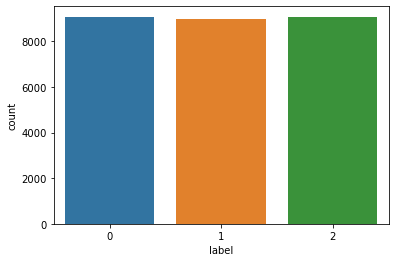

In [22]:
sns.countplot(data=Train,x='label')

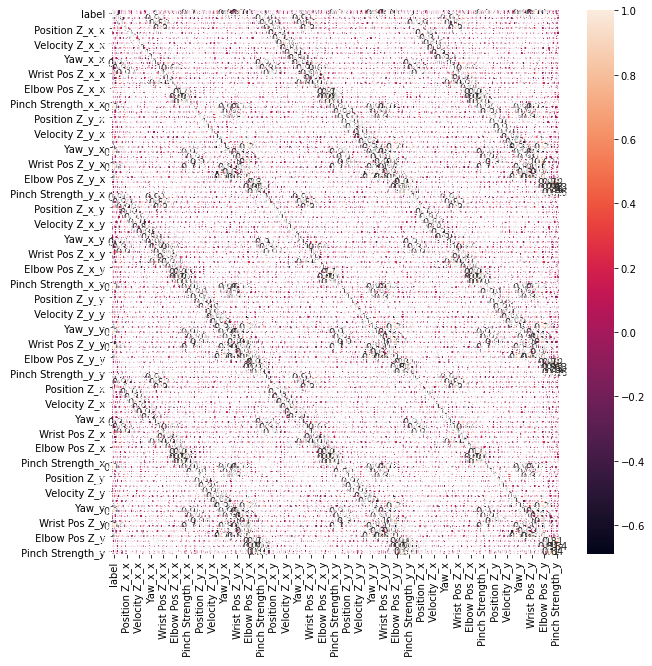

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(Train.corr(), annot = True);

### Since i have so many features it is very hard to visualise my data

### I have mergred 6 time-stamps into one data point that is why I have so many features

In [24]:
Train.head()

,label,Position X_x_x,Position Y_x_x,Position Z_x_x,Velocity X_x_x,Velocity Y_x_x,Velocity Z_x_x,Pitch_x_x,Roll_x_x,Yaw_x_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,0,-49.63403,186.0965,-18.274360,-133.96500,338.190200,17.42292,0.783819,3.000619,1.295304,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.000000
1,0,-54.95034,194.1327,-15.321080,-93.22939,230.042500,78.05305,0.939341,3.087571,1.294511,...,-0.273353,48.94892,202.3287,85.07886,202.4586,38.04674,233.1001,0.0,0.281743,0.000000
2,0,-62.79659,203.8015,-7.082935,-84.33315,-30.228110,129.33020,1.124034,-3.056423,1.367984,...,-0.288245,49.79055,201.8538,82.53721,199.1181,32.01506,228.5434,0.0,0.351661,0.000000
3,0,-72.14013,205.5967,1.548687,-190.09540,-8.395656,119.68360,1.228556,-2.955375,1.392002,...,-0.318157,51.16246,203.4144,82.24403,200.2325,36.39592,231.7279,0.0,0.732624,0.000000
4,0,-77.80249,204.6899,7.418883,-87.23372,-63.953620,64.45666,1.352130,-2.843777,1.438672,...,-0.330888,51.45837,206.1172,82.71241,203.6257,48.67337,239.2980,0.0,0.815687,0.132905


In [25]:
x_train=Train.drop(columns='label')
y_train=Train['label']
x_test=Test.drop(columns='label')
y_test=Test['label']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27139, 108)
(27139,)
(8045, 108)
(8045,)


## Processing my data with a few models

In [26]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix


In [27]:
# scaling the data
resize = Pipeline([
 ("std_scaler", StandardScaler()),
 ("pca", PCA(n_components=0.95, random_state=0,svd_solver='full')),
])
x_train = resize.fit_transform(x_train)
x_test = resize.transform(x_test)

## XGboost

Confusion Matrix for xgb


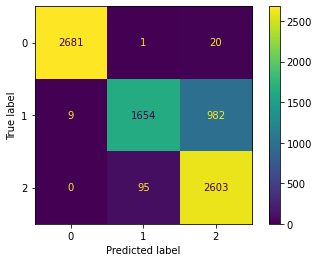

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2702
           1       0.95      0.63      0.75      2645
           2       0.72      0.96      0.83      2698

    accuracy                           0.86      8045
   macro avg       0.89      0.86      0.86      8045
weighted avg       0.89      0.86      0.86      8045

Accuracy Score is  0.8623990055935363


In [28]:
xgb_clf=xgb.XGBClassifier( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eval_metric='mlogloss',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=10,
             monotone_constraints='()', n_estimators=400, n_jobs=-1,
             num_parallel_tree=1, objective='multi:softprob', random_state=42,
             reg_alpha=1, reg_lambda=5, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
xgb_clf.fit(x_train,y_train)
y_pred = xgb_clf.predict(x_test)

print("Confusion Matrix for xgb")
plot_confusion_matrix( xgb_clf, x_test , y_test)
plt.show()
plt.close() 

print(classification_report(y_test,y_pred))
xgb_score= xgb_clf.score(x_test, y_test)
print("Accuracy Score is ", xgb_score)



## KNN

Confusion Matrix for KNN


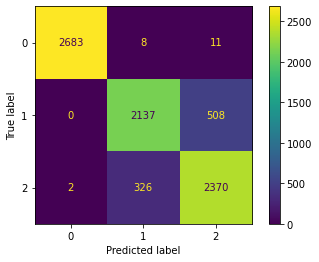

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2702
           1       0.86      0.81      0.84      2645
           2       0.82      0.88      0.85      2698

    accuracy                           0.89      8045
   macro avg       0.89      0.89      0.89      8045
weighted avg       0.90      0.89      0.89      8045

Accuracy Score is  0.8937228091982597


In [29]:
knn_clf=KNeighborsClassifier(n_neighbors=45,weights='distance')
knn_clf.fit(x_train,y_train)
y_pred = knn_clf.predict(x_test)

print("Confusion Matrix for KNN")
plot_confusion_matrix( knn_clf, x_test , y_test)
plt.show()
plt.close() 

print(classification_report(y_test,y_pred))
knn_score= knn_clf.score(x_test, y_test)
print("Accuracy Score is ", knn_score)

## Bagging 

Confusion Matrix for Bagging


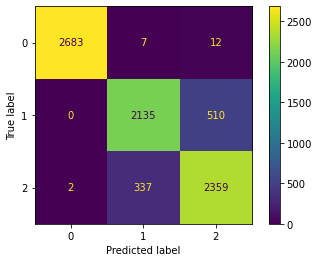

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2702
           1       0.86      0.81      0.83      2645
           2       0.82      0.87      0.85      2698

    accuracy                           0.89      8045
   macro avg       0.89      0.89      0.89      8045
weighted avg       0.89      0.89      0.89      8045

Accuracy Score is  0.8921068986948415


In [30]:
bag_clf=BaggingClassifier(knn_clf)
bag_clf.fit(x_train,y_train)
y_pred = bag_clf.predict(x_test)

print("Confusion Matrix for Bagging")
plot_confusion_matrix( bag_clf, x_test , y_test)
plt.show()
plt.close() 

print(classification_report(y_test,y_pred))
bag_score= bag_clf.score(x_test, y_test)
print("Accuracy Score is ", bag_score)

## Random Forest

Confusion Matrix for RF


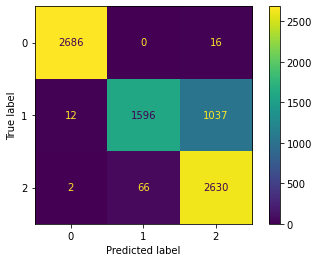

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2702
           1       0.96      0.60      0.74      2645
           2       0.71      0.97      0.82      2698

    accuracy                           0.86      8045
   macro avg       0.89      0.86      0.85      8045
weighted avg       0.89      0.86      0.85      8045

Accuracy Score is  0.8591671845866998


In [31]:
rf_clf=RandomForestClassifier(max_depth= 60, max_features= 2,
                              min_samples_leaf= 3,min_samples_split= 12, n_estimators= 100)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

print("Confusion Matrix for RF")
plot_confusion_matrix( rf_clf, x_test , y_test)
plt.show()
plt.close() 

print(classification_report(y_test,y_pred))
rf_score= rf_clf.score(x_test, y_test)
print("Accuracy Score is ", rf_score)

## LogisticRegression

Confusion Matrix for LR


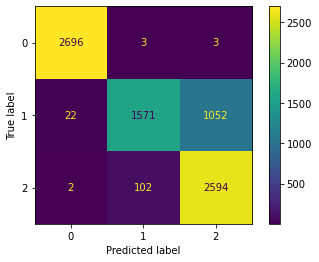

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2702
           1       0.94      0.59      0.73      2645
           2       0.71      0.96      0.82      2698

    accuracy                           0.85      8045
   macro avg       0.88      0.85      0.85      8045
weighted avg       0.88      0.85      0.85      8045

Accuracy Score is  0.8528278433809819


In [32]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
y_pred = lr_clf.predict(x_test)

print("Confusion Matrix for LR")
plot_confusion_matrix( lr_clf, x_test , y_test)
plt.show()
plt.close() 

print(classification_report(y_test,y_pred))
lr_score= lr_clf.score(x_test, y_test)
print("Accuracy Score is ", lr_score)

## Ada Boost

Confusion Matrix for Ada


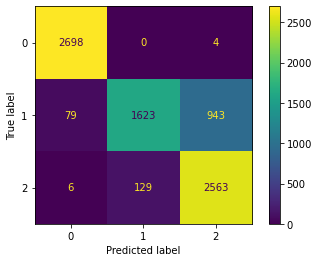

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2702
           1       0.93      0.61      0.74      2645
           2       0.73      0.95      0.83      2698

    accuracy                           0.86      8045
   macro avg       0.88      0.85      0.85      8045
weighted avg       0.88      0.86      0.85      8045

Accuracy Score is  0.8556867619639528


In [33]:
ada_clf=AdaBoostClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                   learning_rate=0.01, n_estimators=100)
ada_clf.fit(x_train,y_train)
y_pred = ada_clf.predict(x_test)

print("Confusion Matrix for Ada")
plot_confusion_matrix( ada_clf, x_test , y_test)
plt.show()
plt.close() 

print(classification_report(y_test,y_pred))
ada_score= ada_clf.score(x_test, y_test)
print("Accuracy Score is ", ada_score)

## Stacking

Confusion Matrix for Stacking


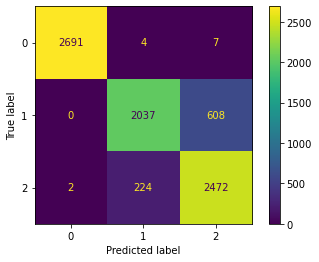

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2702
           1       0.90      0.77      0.83      2645
           2       0.80      0.92      0.85      2698

    accuracy                           0.89      8045
   macro avg       0.90      0.89      0.89      8045
weighted avg       0.90      0.89      0.89      8045

Accuracy Score is  0.8949658172778123


In [34]:
stk_clf= StackingClassifier(
        estimators=[
          ('knn',knn_clf ),
          ('ada', ada_clf),
          ('bag',bag_clf)
        ],final_estimator=lr_clf
    ,n_jobs=-1)
stk_clf.fit(x_train,y_train)
y_pred = stk_clf.predict(x_test)

print("Confusion Matrix for Stacking")
plot_confusion_matrix( stk_clf, x_test , y_test)
plt.show()
plt.close() 

print(classification_report(y_test,y_pred))
st_score= stk_clf.score(x_test, y_test)
print("Accuracy Score is ", st_score)

## Comparing models

In [35]:
model=["KNN","Logistic Regression", "Random Forest", "Stacking", "AdaBoosting", "XgBoosting", "Bagging"]
values=[knn_score, lr_score, rf_score, st_score, ada_score, xgb_score, bag_score ]
table=pd.DataFrame({"Models":model,"Score":values})
display(table)

,Models,Score
0,KNN,0.893723
1,Logistic Regression,0.852828
2,Random Forest,0.859167
3,Stacking,0.894966
4,AdaBoosting,0.855687
5,XgBoosting,0.862399
6,Bagging,0.892107


### My best result is stacking with 89.6 % accuracy 